In [90]:
using Statistics
using GR

**Problem 01:**

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23. Find the sum of all the multiples of 3 or 5 below 1000.

In [1]:
### Thing to note: Julia implicitely defines a "begin" with the start of the keyword function. 
function sum_multiples(limit = 1000)
    sum = 0
    for num in 1:limit-1
        if (num % 3 == 0) || (num % 5 == 0) 
            sum += num
        end
    end
    return sum
end

sum_multiples (generic function with 2 methods)

In [3]:
@time sum_multiples()

  0.000003 seconds


233168

**Problem 02:**

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be: 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [4]:
#I'm going to be using recursion here just cuz I wanna see how it compares with the iterative solution!
#I don't expect to see any meaningful speedup, but I'm curious to know how it compares with a Python solution

In [12]:
function fibonacci_term(term_num)::Int64 #Cool vestige from C/C++ Declaration of function return type
    if (term_num == 0 || term_num == 1)
        return term_num
    else
        return fibonacci_term(term_num-1) + fibonacci_term(term_num-2) 
    end
end


function even_fibonacci(cutoff = 4e06)::Int64
    sum = 0
    term_num = 0
    while true
        fib_num = fibonacci_term(term_num)
        
        if (fib_num %2 == 0) && (fib_num < cutoff)
            sum += fib_num
        elseif fib_num >= cutoff
            break
        end
        
    term_num += 1
    end
    return sum
end    

even_fibonacci (generic function with 2 methods)

**Attempting to plot a simple histogram of run-times**

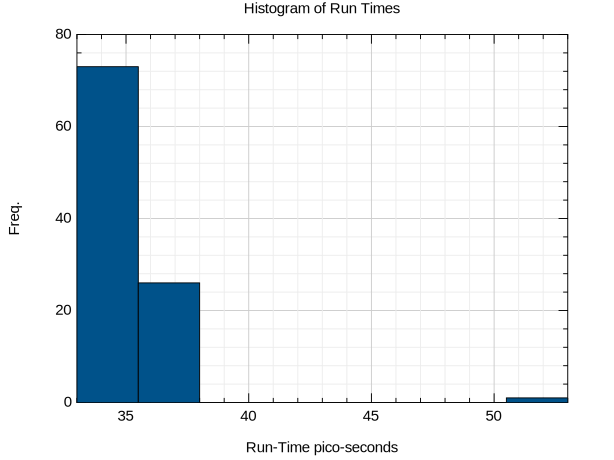

In [134]:
using GR
range_nums = collect(1:100)
list_ = Float64[]
for num_attempts in range_nums
    append!(list_, (@elapsed list_)*1e9)
end
title("Histogram of Run Times")
histogram(list_)
xlabel("Run-Time pico-seconds")
ylabel("Freq.")
histogram(list_)

**Problem 03:**

The prime factors of 13195 are 5, 7, 13 and 29. What is the largest prime factor of the number 600851475143 ?

In [10]:
function check_prime(number)::Bool
    for factor in collect(1:number)
        if number == 1 return false end
        
        if number % factor == 0
            if (number == factor) || (factor == 1)
                continue
            else
                return false
            end
        end
    end
    return true
end

function get_greatest_prime(number)
    number = Int(round(sqrt(number)))
    list_prime_factors = Int64[]
    for factor in collect(1:number)
        if check_prime(factor)
            if number % factor == 0 append!(list_prime_factors, factor) end
        end
    end
    return maximum(list_prime_factors)
end

In [9]:
get_greatest_prime(600851475143)

137